# Investigation of Ford GoBike's trip data

## By Nimisha Agarwal

## Investigation Overview

Bay Wheels (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. This exploration and visualization study primarily focuses on finding the bike usage pattern and customer habit characteristics from the 12-month ride trips data in 2018.

## Dataset Overview

The dataset used for this exploratory analysis consists of monthly individual trip data covering the greater San Francisco Bay area. Visualizations below are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics.

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [13]:
# load in the dataset into a pandas dataframe and clean up field dtypes
df = pd.read_csv('baywheels.csv')
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['latitude_diff'] = df['start_station_latitude'] - df['end_station_latitude']
df['longitude_diff'] = df['start_station_longitude'] - df['end_station_longitude']
df['duration_minute'] = df['duration_sec']/60

df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hourofday'] = df.start_time.dt.strftime('%H')
df['start_dayofweek'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')

df['start_station_id'] = df['start_station_id'].astype('int').astype('str')
df['end_station_id'] = df['end_station_id'].astype('float').astype('int').astype('str')
df['bike_id'] = df['bike_id'].astype('float').astype('int').astype('str')

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['start_dayofweek'] = df['start_dayofweek'].astype(pd.api.types.CategoricalDtype(ordered=True, categories=weekday))

df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29557 entries, 0 to 29556
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             29557 non-null  int64         
 1   start_time               29557 non-null  datetime64[ns]
 2   end_time                 29557 non-null  datetime64[ns]
 3   start_station_id         29557 non-null  object        
 4   start_station_name       29557 non-null  object        
 5   start_station_latitude   29557 non-null  float64       
 6   start_station_longitude  29557 non-null  float64       
 7   end_station_id           29557 non-null  object        
 8   end_station_name         29557 non-null  object        
 9   end_station_latitude     29557 non-null  float64       
 10  end_station_longitude    29557 non-null  float64       
 11  bike_id                  29557 non-null  object        
 12  user_type                29557 n

## Weekly Usage Between Customers And Subscribers

Subscribers contributed the majority of the bike usage, about 89%, while about 11% is consumed by cusomters (or casual users). Subscribers ride the most during Monday to Wednesday. The usage of bike is not popular on weekdays.

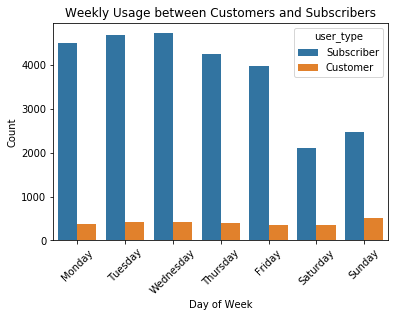

In [24]:
# Countplot shoes the count of subscribers/customers against week days

sb.countplot(data=df, x='start_dayofweek', hue='user_type');
plt.xticks(rotation=45);
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title('Weekly Usage between Customers and Subscribers');

# Wednesday has the highest for both subscriber and customer

## Average Weekday Trip Duration for Customers and Subscribers

Subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types had an obvious increase of trip duration on Saturdays and Sundays (or weekends), especially casual customers. Subscriber usage was more efficient than customers overall and maintained a pretty consistent average duration Monday through Friday.

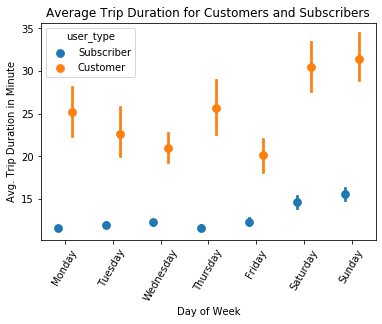

In [26]:
# Using point plot to make estimate of central tendency for a trip duartion(in minutes) by the position of scatter plot points
# and provides some indication of the uncertainty around that estimate using error bars

sb.pointplot(data=df, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xticks(rotation=60);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('Average Trip Duration for Customers and Subscribers');

## Hourly Usage during Weekdays for Customers and Subscribers

Different usage patterns/habits between the two types of riders are clearly seen. Subscribers used the system heavily on work days i.e. Monday through Friday, whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-9am and 13-15pm on work days for subscribers when used for work commute, yet casual customers tended to use more in the late afternoon around 17pm Monday to Friday. Other than the different usage goals, it may also have to do with the traffic situation around these rush hours in the area.

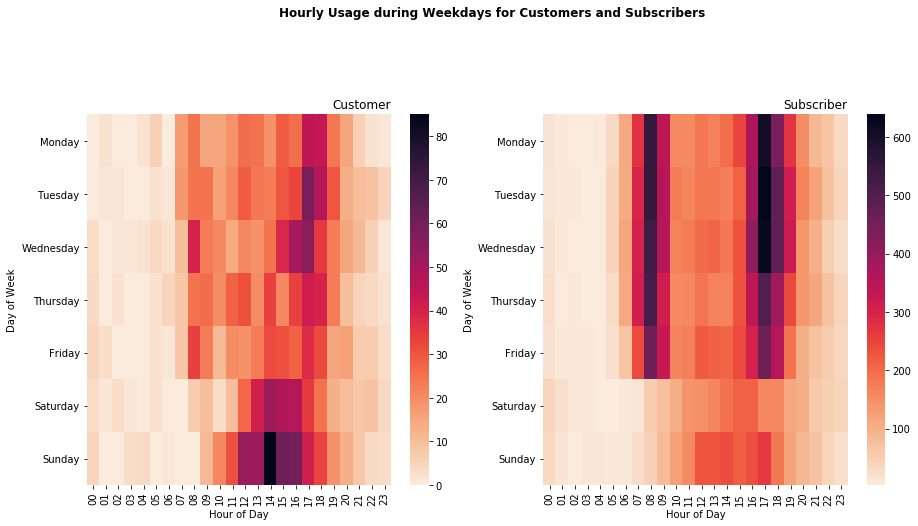

In [27]:
plt.figure(figsize=[15, 15]);
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers',fontsize=12,fontweight='semibold')

# Making heatmap for customers

plt.subplot(2, 2, 1)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

# Making heatmap for Subscribers

plt.subplot(2, 2, 2)
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

# Summary
There was a lot more subscribers using the bike sharing system 
than casual customers overall, both of which ride the most during 
the summer season and the least during the winter months. 
Obviously different usage patterns and riding habits are observed 
between the two types of riders. Subscribers used the system 
heavily on work days concentrated around 8-9am and 13-15pm 
for work commute, whereas customers ride a lot over weekends 
and in the afternoon for leisure/touring purposes. Subscribers 
tended to have much shorter/quicker trips compared to 
customers which makes subscriber usage more efficient.